In [1]:
'''
Implemented:
Mini-batch size                : 256
Inputs img size                : 32*32 (padding 2)
Discriminator output activation: Softmax
Generator output activation    : torch.clamp(G(noise)+img, 0, 1)

Pending:
Generator loss function        : correct_penalty + reconstruction_loss + rDGX
Discriminator loss function    : DX + DGX
Game battle                    : slightly increase lr of Discriminator 
'''
import warnings
warnings.filterwarnings('ignore')

In [2]:
import torch
# 0. set variables & hyper-parameters for experiment
# variables
model = torch.load('store/MNIST_CNN.pt')

# hyper-parameters
hyperparas = {
    'adv_types': ['None', 'FGSM', 'JSMA', 'CWL2', 'LINFPGD', 'LINFBI', 'ENL1', 'ST'],
    
    'mini_batch_size': 32,
    'num_of_features': 32,
    'draw_interval': 100,
    
    'pre_train_epoches': 1,
    'train_epoches': 3,
    
    'cor_pen_para': 1, 
    'recon_para': 1,
    'g_dis_para': 2, 
    'g_repeat_num': 5,
    
    'cor_sam_para': 1, 
    'gen_sam_para': 1, 
    
    
    'G_lr': 1e-3,
    'D_lr': 1e-6
}

In [3]:
# 1. prepare dataset 
import torchvision
import torchvision.transforms as transforms

trans = transforms.Compose([
    transforms.Pad(padding=2),
    transforms.ToTensor()
])
dataset=torchvision.datasets.MNIST(root='.data', train=True, transform=trans, download=True)
loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=hyperparas['mini_batch_size'], shuffle=True)

In [4]:
# 2.a instantiate Generator 
# 2.b instantiate Discriminator 
from OCCGAN import Generator, Discriminator 
G = Generator(hyperparas['num_of_features'])
D = Discriminator(hyperparas['num_of_features'])
G_optim = torch.optim.Adam(G.parameters(), lr=hyperparas['G_lr'])
D_optim = torch.optim.Adam(D.parameters(), lr=hyperparas['D_lr'])

Gen loss: 0.837 Cor penality: 0.134 Recon loss: 0.702


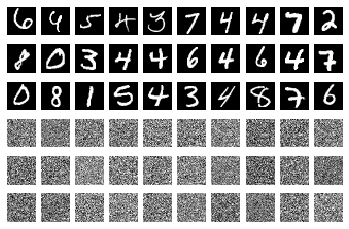

Gen loss: 0.777 Cor penality: 0.11 Recon loss: 0.667
Gen loss: 0.74 Cor penality: 0.11 Recon loss: 0.63
Gen loss: 0.695 Cor penality: 0.105 Recon loss: 0.59
Gen loss: 0.65 Cor penality: 0.094 Recon loss: 0.556
Gen loss: 0.607 Cor penality: 0.095 Recon loss: 0.512
Gen loss: 0.559 Cor penality: 0.092 Recon loss: 0.468
Gen loss: 0.524 Cor penality: 0.104 Recon loss: 0.42
Gen loss: 0.473 Cor penality: 0.078 Recon loss: 0.395
Gen loss: 0.535 Cor penality: 0.18 Recon loss: 0.355
Gen loss: 0.405 Cor penality: 0.084 Recon loss: 0.321
Gen loss: 0.395 Cor penality: 0.101 Recon loss: 0.294
Gen loss: 0.358 Cor penality: 0.091 Recon loss: 0.268
Gen loss: 0.337 Cor penality: 0.071 Recon loss: 0.266
Gen loss: 0.328 Cor penality: 0.075 Recon loss: 0.253
Gen loss: 0.362 Cor penality: 0.068 Recon loss: 0.294
Gen loss: 0.365 Cor penality: 0.083 Recon loss: 0.281
Gen loss: 0.381 Cor penality: 0.117 Recon loss: 0.264
Gen loss: 0.364 Cor penality: 0.09 Recon loss: 0.274
Gen loss: 0.357 Cor penality: 0.068 R

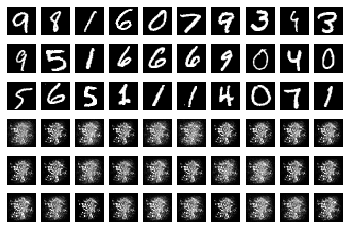

Gen loss: 0.266 Cor penality: 0.031 Recon loss: 0.235
Gen loss: 0.257 Cor penality: 0.028 Recon loss: 0.229
Gen loss: 0.258 Cor penality: 0.001 Recon loss: 0.257
Gen loss: 0.262 Cor penality: 0.0 Recon loss: 0.262
Gen loss: 0.237 Cor penality: 0.004 Recon loss: 0.234
Gen loss: 0.24 Cor penality: 0.001 Recon loss: 0.239
Gen loss: 0.249 Cor penality: 0.001 Recon loss: 0.249
Gen loss: 0.281 Cor penality: 0.032 Recon loss: 0.249
Gen loss: 0.245 Cor penality: 0.001 Recon loss: 0.244
Gen loss: 0.25 Cor penality: 0.011 Recon loss: 0.24
Gen loss: 0.243 Cor penality: 0.002 Recon loss: 0.241
Gen loss: 0.321 Cor penality: 0.092 Recon loss: 0.229
Gen loss: 0.251 Cor penality: 0.014 Recon loss: 0.237
Gen loss: 0.268 Cor penality: 0.011 Recon loss: 0.256
Gen loss: 0.332 Cor penality: 0.088 Recon loss: 0.244
Gen loss: 0.247 Cor penality: 0.004 Recon loss: 0.242
Gen loss: 0.252 Cor penality: 0.001 Recon loss: 0.251
Gen loss: 0.254 Cor penality: 0.005 Recon loss: 0.249
Gen loss: 0.241 Cor penality: 0.0

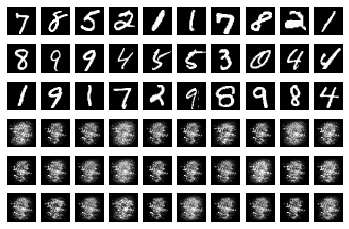

Gen loss: 0.261 Cor penality: 0.036 Recon loss: 0.225
Gen loss: 0.222 Cor penality: 0.0 Recon loss: 0.222
Gen loss: 0.218 Cor penality: 0.003 Recon loss: 0.215
Gen loss: 0.223 Cor penality: 0.0 Recon loss: 0.223
Gen loss: 0.227 Cor penality: 0.001 Recon loss: 0.226
Gen loss: 0.225 Cor penality: 0.009 Recon loss: 0.216
Gen loss: 0.224 Cor penality: 0.0 Recon loss: 0.223
Gen loss: 0.212 Cor penality: 0.0 Recon loss: 0.212
Gen loss: 0.215 Cor penality: 0.002 Recon loss: 0.213
Gen loss: 0.236 Cor penality: 0.019 Recon loss: 0.217
Gen loss: 0.261 Cor penality: 0.048 Recon loss: 0.213
Gen loss: 0.212 Cor penality: 0.0 Recon loss: 0.211
Gen loss: 0.23 Cor penality: 0.0 Recon loss: 0.23
Gen loss: 0.226 Cor penality: 0.001 Recon loss: 0.224
Gen loss: 0.227 Cor penality: 0.002 Recon loss: 0.226
Gen loss: 0.223 Cor penality: 0.001 Recon loss: 0.222
Gen loss: 0.227 Cor penality: 0.008 Recon loss: 0.219
Gen loss: 0.22 Cor penality: 0.004 Recon loss: 0.216
Gen loss: 0.301 Cor penality: 0.079 Recon l

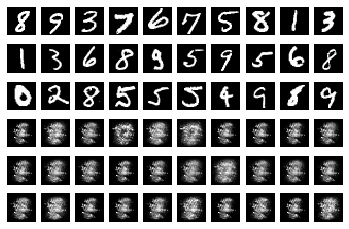

Gen loss: 0.202 Cor penality: 0.001 Recon loss: 0.201
Gen loss: 0.221 Cor penality: 0.001 Recon loss: 0.221
Gen loss: 0.217 Cor penality: 0.0 Recon loss: 0.217
Gen loss: 0.222 Cor penality: 0.001 Recon loss: 0.221
Gen loss: 0.216 Cor penality: 0.001 Recon loss: 0.215
Gen loss: 0.216 Cor penality: 0.0 Recon loss: 0.216
Gen loss: 0.204 Cor penality: 0.0 Recon loss: 0.204
Gen loss: 0.2 Cor penality: 0.001 Recon loss: 0.199
Gen loss: 0.246 Cor penality: 0.029 Recon loss: 0.217
Gen loss: 0.231 Cor penality: 0.024 Recon loss: 0.207
Gen loss: 0.238 Cor penality: 0.03 Recon loss: 0.208
Gen loss: 0.219 Cor penality: 0.001 Recon loss: 0.217
Gen loss: 0.202 Cor penality: 0.005 Recon loss: 0.197
Gen loss: 0.226 Cor penality: 0.0 Recon loss: 0.226
Gen loss: 0.217 Cor penality: 0.002 Recon loss: 0.216
Gen loss: 0.217 Cor penality: 0.0 Recon loss: 0.217
Gen loss: 0.246 Cor penality: 0.031 Recon loss: 0.215
Gen loss: 0.202 Cor penality: 0.0 Recon loss: 0.202
Gen loss: 0.196 Cor penality: 0.001 Recon l

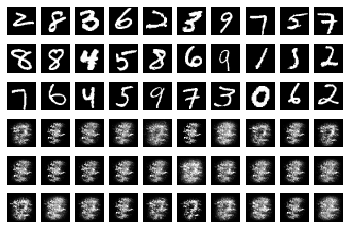

Gen loss: 0.275 Cor penality: 0.065 Recon loss: 0.21
Gen loss: 0.21 Cor penality: 0.0 Recon loss: 0.21
Gen loss: 0.21 Cor penality: 0.001 Recon loss: 0.21
Gen loss: 0.243 Cor penality: 0.032 Recon loss: 0.211
Gen loss: 0.205 Cor penality: 0.0 Recon loss: 0.204
Gen loss: 0.236 Cor penality: 0.031 Recon loss: 0.204
Gen loss: 0.217 Cor penality: 0.0 Recon loss: 0.216
Gen loss: 0.245 Cor penality: 0.031 Recon loss: 0.214
Gen loss: 0.245 Cor penality: 0.032 Recon loss: 0.214
Gen loss: 0.217 Cor penality: 0.0 Recon loss: 0.217
Gen loss: 0.232 Cor penality: 0.002 Recon loss: 0.231
Gen loss: 0.202 Cor penality: 0.001 Recon loss: 0.201
Gen loss: 0.226 Cor penality: 0.001 Recon loss: 0.226
Gen loss: 0.244 Cor penality: 0.047 Recon loss: 0.197
Gen loss: 0.227 Cor penality: 0.0 Recon loss: 0.227
Gen loss: 0.208 Cor penality: 0.002 Recon loss: 0.206
Gen loss: 0.214 Cor penality: 0.0 Recon loss: 0.213
Gen loss: 0.265 Cor penality: 0.032 Recon loss: 0.234
Gen loss: 0.22 Cor penality: 0.006 Recon loss

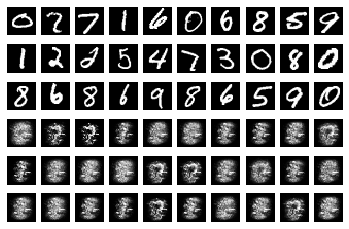

Gen loss: 0.202 Cor penality: 0.001 Recon loss: 0.201
Gen loss: 0.199 Cor penality: 0.0 Recon loss: 0.199
Gen loss: 0.204 Cor penality: 0.004 Recon loss: 0.2
Gen loss: 0.258 Cor penality: 0.052 Recon loss: 0.206
Gen loss: 0.219 Cor penality: 0.0 Recon loss: 0.218
Gen loss: 0.231 Cor penality: 0.03 Recon loss: 0.201
Gen loss: 0.232 Cor penality: 0.032 Recon loss: 0.2
Gen loss: 0.207 Cor penality: 0.0 Recon loss: 0.207
Gen loss: 0.213 Cor penality: 0.011 Recon loss: 0.202
Gen loss: 0.213 Cor penality: 0.002 Recon loss: 0.211
Gen loss: 0.21 Cor penality: 0.0 Recon loss: 0.21
Gen loss: 0.208 Cor penality: 0.0 Recon loss: 0.207
Gen loss: 0.198 Cor penality: 0.0 Recon loss: 0.198
Gen loss: 0.208 Cor penality: 0.0 Recon loss: 0.208
Gen loss: 0.216 Cor penality: 0.0 Recon loss: 0.215
Gen loss: 0.213 Cor penality: 0.0 Recon loss: 0.212
Gen loss: 0.215 Cor penality: 0.0 Recon loss: 0.214
Gen loss: 0.208 Cor penality: 0.0 Recon loss: 0.207
Gen loss: 0.202 Cor penality: 0.0 Recon loss: 0.201
Gen l

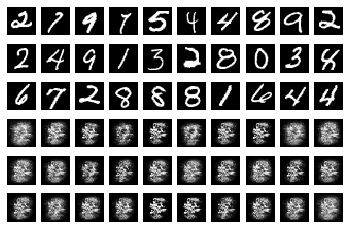

Gen loss: 0.227 Cor penality: 0.0 Recon loss: 0.227
Gen loss: 0.234 Cor penality: 0.031 Recon loss: 0.203
Gen loss: 0.242 Cor penality: 0.031 Recon loss: 0.21
Gen loss: 0.212 Cor penality: 0.0 Recon loss: 0.212
Gen loss: 0.218 Cor penality: 0.0 Recon loss: 0.217
Gen loss: 0.243 Cor penality: 0.031 Recon loss: 0.211
Gen loss: 0.205 Cor penality: 0.0 Recon loss: 0.205
Gen loss: 0.203 Cor penality: 0.0 Recon loss: 0.203
Gen loss: 0.231 Cor penality: 0.0 Recon loss: 0.231
Gen loss: 0.226 Cor penality: 0.0 Recon loss: 0.226
Gen loss: 0.223 Cor penality: 0.009 Recon loss: 0.214
Gen loss: 0.203 Cor penality: 0.0 Recon loss: 0.203
Gen loss: 0.213 Cor penality: 0.002 Recon loss: 0.211
Gen loss: 0.216 Cor penality: 0.001 Recon loss: 0.216
Gen loss: 0.205 Cor penality: 0.002 Recon loss: 0.203
Gen loss: 0.248 Cor penality: 0.032 Recon loss: 0.216
Gen loss: 0.199 Cor penality: 0.002 Recon loss: 0.198
Gen loss: 0.201 Cor penality: 0.001 Recon loss: 0.2
Gen loss: 0.21 Cor penality: 0.001 Recon loss: 

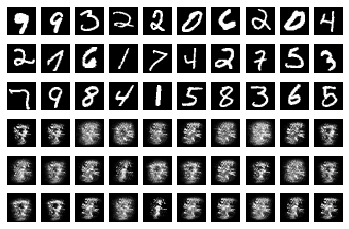

Gen loss: 0.196 Cor penality: 0.001 Recon loss: 0.195
Gen loss: 0.196 Cor penality: 0.0 Recon loss: 0.196
Gen loss: 0.236 Cor penality: 0.031 Recon loss: 0.205
Gen loss: 0.188 Cor penality: 0.002 Recon loss: 0.186
Gen loss: 0.207 Cor penality: 0.006 Recon loss: 0.202
Gen loss: 0.215 Cor penality: 0.001 Recon loss: 0.213
Gen loss: 0.203 Cor penality: 0.0 Recon loss: 0.203
Gen loss: 0.205 Cor penality: 0.001 Recon loss: 0.204
Gen loss: 0.204 Cor penality: 0.002 Recon loss: 0.202
Gen loss: 0.198 Cor penality: 0.002 Recon loss: 0.196
Gen loss: 0.2 Cor penality: 0.002 Recon loss: 0.198
Gen loss: 0.198 Cor penality: 0.004 Recon loss: 0.193
Gen loss: 0.207 Cor penality: 0.001 Recon loss: 0.206
Gen loss: 0.197 Cor penality: 0.0 Recon loss: 0.197
Gen loss: 0.209 Cor penality: 0.0 Recon loss: 0.209
Gen loss: 0.25 Cor penality: 0.058 Recon loss: 0.192
Gen loss: 0.236 Cor penality: 0.053 Recon loss: 0.183
Gen loss: 0.191 Cor penality: 0.0 Recon loss: 0.19
Gen loss: 0.208 Cor penality: 0.0 Recon lo

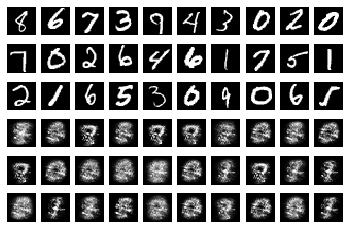

Gen loss: 0.19 Cor penality: 0.0 Recon loss: 0.19
Gen loss: 0.204 Cor penality: 0.002 Recon loss: 0.201
Gen loss: 0.209 Cor penality: 0.003 Recon loss: 0.206
Gen loss: 0.196 Cor penality: 0.0 Recon loss: 0.195
Gen loss: 0.227 Cor penality: 0.032 Recon loss: 0.195
Gen loss: 0.198 Cor penality: 0.0 Recon loss: 0.198
Gen loss: 0.227 Cor penality: 0.032 Recon loss: 0.196
Gen loss: 0.188 Cor penality: 0.001 Recon loss: 0.186
Gen loss: 0.182 Cor penality: 0.001 Recon loss: 0.181
Gen loss: 0.187 Cor penality: 0.001 Recon loss: 0.187
Gen loss: 0.189 Cor penality: 0.0 Recon loss: 0.189
Gen loss: 0.198 Cor penality: 0.0 Recon loss: 0.198
Gen loss: 0.196 Cor penality: 0.001 Recon loss: 0.196
Gen loss: 0.19 Cor penality: 0.0 Recon loss: 0.19
Gen loss: 0.189 Cor penality: 0.001 Recon loss: 0.188
Gen loss: 0.27 Cor penality: 0.082 Recon loss: 0.188
Gen loss: 0.214 Cor penality: 0.031 Recon loss: 0.183
Gen loss: 0.199 Cor penality: 0.001 Recon loss: 0.198
Gen loss: 0.189 Cor penality: 0.0 Recon loss:

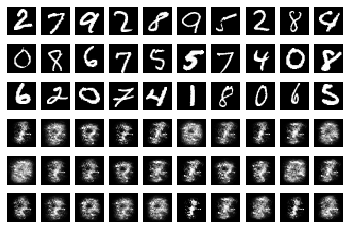

Gen loss: 0.196 Cor penality: 0.002 Recon loss: 0.194
Gen loss: 0.211 Cor penality: 0.007 Recon loss: 0.204
Gen loss: 0.194 Cor penality: 0.003 Recon loss: 0.192
Gen loss: 0.198 Cor penality: 0.0 Recon loss: 0.198
Gen loss: 0.196 Cor penality: 0.001 Recon loss: 0.195
Gen loss: 0.23 Cor penality: 0.009 Recon loss: 0.221
Gen loss: 0.254 Cor penality: 0.063 Recon loss: 0.191
Gen loss: 0.199 Cor penality: 0.001 Recon loss: 0.198
Gen loss: 0.218 Cor penality: 0.005 Recon loss: 0.213
Gen loss: 0.206 Cor penality: 0.001 Recon loss: 0.204
Gen loss: 0.204 Cor penality: 0.001 Recon loss: 0.203
Gen loss: 0.207 Cor penality: 0.001 Recon loss: 0.205
Gen loss: 0.203 Cor penality: 0.001 Recon loss: 0.203
Gen loss: 0.195 Cor penality: 0.0 Recon loss: 0.195
Gen loss: 0.205 Cor penality: 0.006 Recon loss: 0.2
Gen loss: 0.201 Cor penality: 0.001 Recon loss: 0.2
Gen loss: 0.203 Cor penality: 0.004 Recon loss: 0.199
Gen loss: 0.204 Cor penality: 0.002 Recon loss: 0.203
Gen loss: 0.184 Cor penality: 0.0 Rec

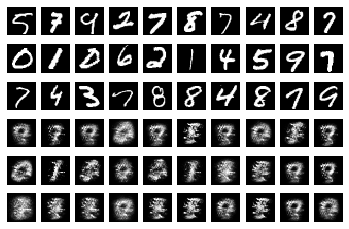

Gen loss: 0.182 Cor penality: 0.0 Recon loss: 0.182
Gen loss: 0.197 Cor penality: 0.006 Recon loss: 0.191
Gen loss: 0.181 Cor penality: 0.0 Recon loss: 0.181
Gen loss: 0.185 Cor penality: 0.009 Recon loss: 0.177
Gen loss: 0.178 Cor penality: 0.0 Recon loss: 0.178
Gen loss: 0.208 Cor penality: 0.027 Recon loss: 0.181
Gen loss: 0.183 Cor penality: 0.0 Recon loss: 0.182
Gen loss: 0.187 Cor penality: 0.001 Recon loss: 0.186
Gen loss: 0.175 Cor penality: 0.001 Recon loss: 0.175
Gen loss: 0.184 Cor penality: 0.0 Recon loss: 0.184
Gen loss: 0.189 Cor penality: 0.008 Recon loss: 0.181
Gen loss: 0.219 Cor penality: 0.032 Recon loss: 0.188
Gen loss: 0.174 Cor penality: 0.0 Recon loss: 0.174
Gen loss: 0.214 Cor penality: 0.024 Recon loss: 0.19
Gen loss: 0.19 Cor penality: 0.0 Recon loss: 0.19
Gen loss: 0.178 Cor penality: 0.002 Recon loss: 0.176
Gen loss: 0.228 Cor penality: 0.032 Recon loss: 0.196
Gen loss: 0.179 Cor penality: 0.001 Recon loss: 0.178
Gen loss: 0.228 Cor penality: 0.032 Recon los

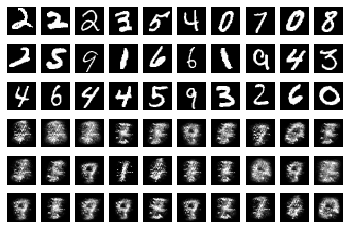

Gen loss: 0.166 Cor penality: 0.003 Recon loss: 0.163
Gen loss: 0.181 Cor penality: 0.001 Recon loss: 0.18
Gen loss: 0.17 Cor penality: 0.0 Recon loss: 0.169
Gen loss: 0.175 Cor penality: 0.0 Recon loss: 0.174
Gen loss: 0.189 Cor penality: 0.0 Recon loss: 0.189
Gen loss: 0.178 Cor penality: 0.0 Recon loss: 0.178
Gen loss: 0.188 Cor penality: 0.0 Recon loss: 0.188
Gen loss: 0.208 Cor penality: 0.026 Recon loss: 0.182
Gen loss: 0.18 Cor penality: 0.001 Recon loss: 0.18
Gen loss: 0.171 Cor penality: 0.0 Recon loss: 0.171
Gen loss: 0.179 Cor penality: 0.004 Recon loss: 0.175
Gen loss: 0.178 Cor penality: 0.003 Recon loss: 0.175
Gen loss: 0.183 Cor penality: 0.003 Recon loss: 0.179
Gen loss: 0.178 Cor penality: 0.001 Recon loss: 0.177
Gen loss: 0.184 Cor penality: 0.0 Recon loss: 0.183
Gen loss: 0.206 Cor penality: 0.001 Recon loss: 0.204
Gen loss: 0.175 Cor penality: 0.0 Recon loss: 0.175
Gen loss: 0.227 Cor penality: 0.031 Recon loss: 0.196
Gen loss: 0.188 Cor penality: 0.001 Recon loss: 

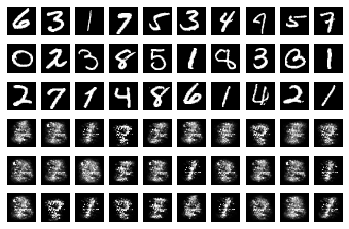

Gen loss: 0.197 Cor penality: 0.002 Recon loss: 0.195
Gen loss: 0.211 Cor penality: 0.005 Recon loss: 0.206
Gen loss: 0.196 Cor penality: 0.001 Recon loss: 0.196
Gen loss: 0.222 Cor penality: 0.032 Recon loss: 0.19
Gen loss: 0.191 Cor penality: 0.0 Recon loss: 0.191
Gen loss: 0.217 Cor penality: 0.023 Recon loss: 0.194
Gen loss: 0.198 Cor penality: 0.0 Recon loss: 0.197
Gen loss: 0.189 Cor penality: 0.0 Recon loss: 0.189
Gen loss: 0.196 Cor penality: 0.014 Recon loss: 0.182
Gen loss: 0.181 Cor penality: 0.0 Recon loss: 0.181
Gen loss: 0.203 Cor penality: 0.0 Recon loss: 0.202
Gen loss: 0.166 Cor penality: 0.0 Recon loss: 0.166
Gen loss: 0.186 Cor penality: 0.0 Recon loss: 0.186
Gen loss: 0.189 Cor penality: 0.001 Recon loss: 0.188
Gen loss: 0.208 Cor penality: 0.027 Recon loss: 0.181
Gen loss: 0.186 Cor penality: 0.0 Recon loss: 0.186
Gen loss: 0.2 Cor penality: 0.003 Recon loss: 0.198
Gen loss: 0.203 Cor penality: 0.013 Recon loss: 0.19
Gen loss: 0.2 Cor penality: 0.025 Recon loss: 0.

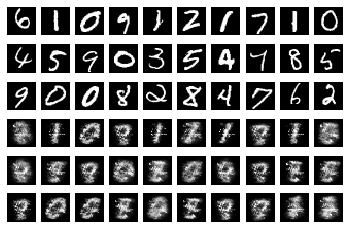

Gen loss: 0.19 Cor penality: 0.001 Recon loss: 0.189
Gen loss: 0.175 Cor penality: 0.0 Recon loss: 0.175
Gen loss: 0.174 Cor penality: 0.0 Recon loss: 0.173
Gen loss: 0.18 Cor penality: 0.0 Recon loss: 0.18
Gen loss: 0.185 Cor penality: 0.0 Recon loss: 0.185
Gen loss: 0.165 Cor penality: 0.0 Recon loss: 0.164
Gen loss: 0.177 Cor penality: 0.0 Recon loss: 0.177
Gen loss: 0.169 Cor penality: 0.0 Recon loss: 0.169
Gen loss: 0.164 Cor penality: 0.0 Recon loss: 0.163
Gen loss: 0.179 Cor penality: 0.0 Recon loss: 0.179
Gen loss: 0.189 Cor penality: 0.008 Recon loss: 0.181
Gen loss: 0.186 Cor penality: 0.005 Recon loss: 0.181
Gen loss: 0.171 Cor penality: 0.0 Recon loss: 0.171
Gen loss: 0.183 Cor penality: 0.0 Recon loss: 0.182
Gen loss: 0.176 Cor penality: 0.0 Recon loss: 0.176
Gen loss: 0.176 Cor penality: 0.005 Recon loss: 0.171
Gen loss: 0.194 Cor penality: 0.0 Recon loss: 0.194
Gen loss: 0.172 Cor penality: 0.0 Recon loss: 0.172
Gen loss: 0.211 Cor penality: 0.026 Recon loss: 0.185
Gen l

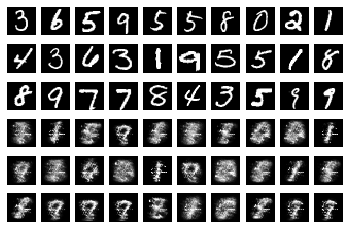

Gen loss: 0.179 Cor penality: 0.0 Recon loss: 0.179
Gen loss: 0.19 Cor penality: 0.0 Recon loss: 0.189
Gen loss: 0.18 Cor penality: 0.0 Recon loss: 0.18
Gen loss: 0.204 Cor penality: 0.03 Recon loss: 0.175
Gen loss: 0.169 Cor penality: 0.0 Recon loss: 0.169
Gen loss: 0.179 Cor penality: 0.0 Recon loss: 0.179
Gen loss: 0.174 Cor penality: 0.0 Recon loss: 0.173
Gen loss: 0.168 Cor penality: 0.002 Recon loss: 0.166
Gen loss: 0.166 Cor penality: 0.0 Recon loss: 0.166
Gen loss: 0.195 Cor penality: 0.013 Recon loss: 0.182
Gen loss: 0.18 Cor penality: 0.0 Recon loss: 0.18
Gen loss: 0.17 Cor penality: 0.001 Recon loss: 0.169
Gen loss: 0.2 Cor penality: 0.031 Recon loss: 0.169
Gen loss: 0.171 Cor penality: 0.0 Recon loss: 0.171
Gen loss: 0.178 Cor penality: 0.001 Recon loss: 0.177
Gen loss: 0.185 Cor penality: 0.001 Recon loss: 0.184
Gen loss: 0.177 Cor penality: 0.0 Recon loss: 0.177
Gen loss: 0.203 Cor penality: 0.034 Recon loss: 0.169
Gen loss: 0.174 Cor penality: 0.001 Recon loss: 0.173
Gen

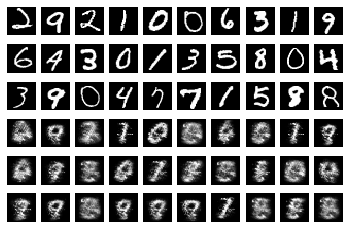

Gen loss: 0.182 Cor penality: 0.018 Recon loss: 0.165
Gen loss: 0.165 Cor penality: 0.0 Recon loss: 0.165
Gen loss: 0.181 Cor penality: 0.001 Recon loss: 0.18
Gen loss: 0.172 Cor penality: 0.0 Recon loss: 0.172
Gen loss: 0.166 Cor penality: 0.003 Recon loss: 0.163
Gen loss: 0.18 Cor penality: 0.001 Recon loss: 0.179
Gen loss: 0.174 Cor penality: 0.0 Recon loss: 0.174
Gen loss: 0.181 Cor penality: 0.002 Recon loss: 0.179
Gen loss: 0.177 Cor penality: 0.006 Recon loss: 0.171
Gen loss: 0.17 Cor penality: 0.001 Recon loss: 0.169
Gen loss: 0.155 Cor penality: 0.0 Recon loss: 0.155
Gen loss: 0.161 Cor penality: 0.0 Recon loss: 0.16
Gen loss: 0.163 Cor penality: 0.0 Recon loss: 0.162
Gen loss: 0.171 Cor penality: 0.0 Recon loss: 0.171
Gen loss: 0.182 Cor penality: 0.025 Recon loss: 0.156
Gen loss: 0.161 Cor penality: 0.0 Recon loss: 0.161
Gen loss: 0.174 Cor penality: 0.007 Recon loss: 0.166
Gen loss: 0.193 Cor penality: 0.032 Recon loss: 0.161
Gen loss: 0.168 Cor penality: 0.002 Recon loss: 

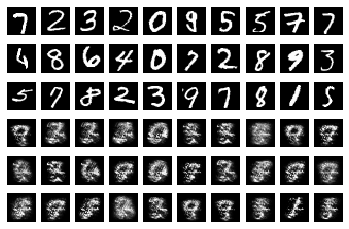

Gen loss: 0.176 Cor penality: 0.005 Recon loss: 0.171
Gen loss: 0.193 Cor penality: 0.001 Recon loss: 0.191
Gen loss: 0.212 Cor penality: 0.033 Recon loss: 0.179
Gen loss: 0.179 Cor penality: 0.001 Recon loss: 0.178
Gen loss: 0.208 Cor penality: 0.022 Recon loss: 0.186
Gen loss: 0.193 Cor penality: 0.01 Recon loss: 0.183
Gen loss: 0.182 Cor penality: 0.001 Recon loss: 0.181
Gen loss: 0.195 Cor penality: 0.002 Recon loss: 0.194
Gen loss: 0.178 Cor penality: 0.005 Recon loss: 0.173
Gen loss: 0.203 Cor penality: 0.021 Recon loss: 0.182
Gen loss: 0.178 Cor penality: 0.001 Recon loss: 0.177
Gen loss: 0.199 Cor penality: 0.011 Recon loss: 0.189
Gen loss: 0.203 Cor penality: 0.009 Recon loss: 0.195
Gen loss: 0.208 Cor penality: 0.02 Recon loss: 0.189
Gen loss: 0.202 Cor penality: 0.001 Recon loss: 0.201
Gen loss: 0.188 Cor penality: 0.002 Recon loss: 0.187
Gen loss: 0.216 Cor penality: 0.032 Recon loss: 0.185
Gen loss: 0.203 Cor penality: 0.001 Recon loss: 0.202
Gen loss: 0.194 Cor penality: 

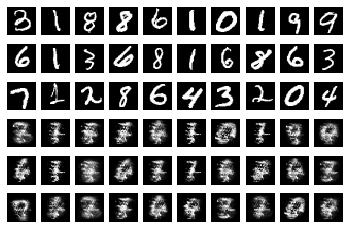

Gen loss: 0.189 Cor penality: 0.012 Recon loss: 0.177
Gen loss: 0.164 Cor penality: 0.0 Recon loss: 0.163
Gen loss: 0.157 Cor penality: 0.0 Recon loss: 0.157
Gen loss: 0.19 Cor penality: 0.001 Recon loss: 0.189
Gen loss: 0.191 Cor penality: 0.015 Recon loss: 0.176
Gen loss: 0.172 Cor penality: 0.0 Recon loss: 0.172
Gen loss: 0.187 Cor penality: 0.001 Recon loss: 0.187
Gen loss: 0.162 Cor penality: 0.0 Recon loss: 0.161
Gen loss: 0.173 Cor penality: 0.003 Recon loss: 0.17
Gen loss: 0.167 Cor penality: 0.001 Recon loss: 0.166
Gen loss: 0.175 Cor penality: 0.0 Recon loss: 0.175
Gen loss: 0.206 Cor penality: 0.032 Recon loss: 0.175
Gen loss: 0.176 Cor penality: 0.017 Recon loss: 0.158
Gen loss: 0.206 Cor penality: 0.018 Recon loss: 0.188
Gen loss: 0.166 Cor penality: 0.001 Recon loss: 0.165
Gen loss: 0.169 Cor penality: 0.001 Recon loss: 0.168
Gen loss: 0.177 Cor penality: 0.001 Recon loss: 0.177
Gen loss: 0.187 Cor penality: 0.003 Recon loss: 0.184
Gen loss: 0.176 Cor penality: 0.0 Recon 

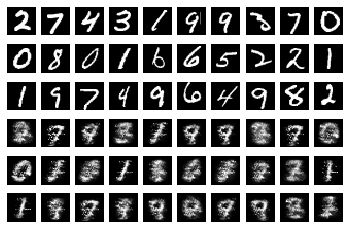

Gen loss: 0.164 Cor penality: 0.001 Recon loss: 0.164
Gen loss: 0.17 Cor penality: 0.001 Recon loss: 0.168
Gen loss: 0.183 Cor penality: 0.0 Recon loss: 0.183
Gen loss: 0.182 Cor penality: 0.006 Recon loss: 0.176
Gen loss: 0.163 Cor penality: 0.0 Recon loss: 0.162
Gen loss: 0.151 Cor penality: 0.0 Recon loss: 0.151
Gen loss: 0.176 Cor penality: 0.0 Recon loss: 0.176
Gen loss: 0.165 Cor penality: 0.0 Recon loss: 0.165
Gen loss: 0.162 Cor penality: 0.0 Recon loss: 0.162
Gen loss: 0.165 Cor penality: 0.001 Recon loss: 0.164
Gen loss: 0.194 Cor penality: 0.023 Recon loss: 0.171
Gen loss: 0.157 Cor penality: 0.0 Recon loss: 0.157
Gen loss: 0.161 Cor penality: 0.0 Recon loss: 0.161
Gen loss: 0.174 Cor penality: 0.004 Recon loss: 0.17
Gen loss: 0.17 Cor penality: 0.002 Recon loss: 0.168
Gen loss: 0.178 Cor penality: 0.007 Recon loss: 0.171
Gen loss: 0.173 Cor penality: 0.0 Recon loss: 0.173
Gen loss: 0.176 Cor penality: 0.001 Recon loss: 0.175
Gen loss: 0.172 Cor penality: 0.0 Recon loss: 0.1

In [5]:
# 3. pre-train Generator 
from OCCGAN import pretrain_G
G = pretrain_G(G, G_optim, model, loader, hyperparas)

Mini-btach 1
Gen loss: 1.838 cor pen: 0.0 recon: 0.164 g_dis: 1.674
Dis loss: 0.797 Dis (DX) loss: 0.562 Dis (DGX) loss: 0.235


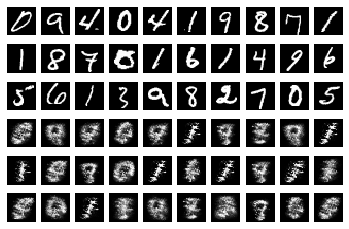

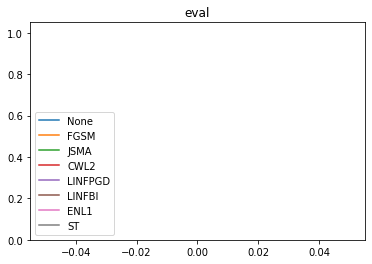

Mini-btach 2
Gen loss: 1.444 cor pen: 0.0 recon: 0.183 g_dis: 1.261
Dis loss: 1.0 Dis (DX) loss: 0.569 Dis (DGX) loss: 0.431
Mini-btach 3
Gen loss: 1.134 cor pen: 0.033 recon: 0.202 g_dis: 0.899
Dis loss: 1.206 Dis (DX) loss: 0.585 Dis (DGX) loss: 0.621
Mini-btach 4
Gen loss: 0.799 cor pen: 0.032 recon: 0.209 g_dis: 0.559
Dis loss: 1.333 Dis (DX) loss: 0.579 Dis (DGX) loss: 0.754
Mini-btach 5
Gen loss: 0.692 cor pen: 0.033 recon: 0.226 g_dis: 0.434
Dis loss: 1.406 Dis (DX) loss: 0.594 Dis (DGX) loss: 0.812
Mini-btach 6
Gen loss: 0.525 cor pen: 0.035 recon: 0.231 g_dis: 0.259
Dis loss: 1.462 Dis (DX) loss: 0.57 Dis (DGX) loss: 0.891
Mini-btach 7
Gen loss: 0.403 cor pen: 0.0 recon: 0.246 g_dis: 0.156
Dis loss: 1.51 Dis (DX) loss: 0.578 Dis (DGX) loss: 0.932
Mini-btach 8
Gen loss: 0.39 cor pen: 0.031 recon: 0.225 g_dis: 0.133
Dis loss: 1.48 Dis (DX) loss: 0.538 Dis (DGX) loss: 0.942
Mini-btach 9
Gen loss: 0.328 cor pen: 0.0 recon: 0.241 g_dis: 0.086
Dis loss: 1.531 Dis (DX) loss: 0.57 Dis

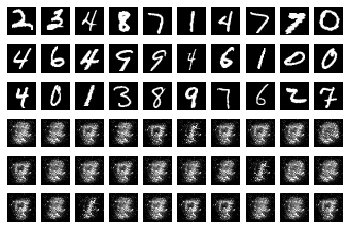

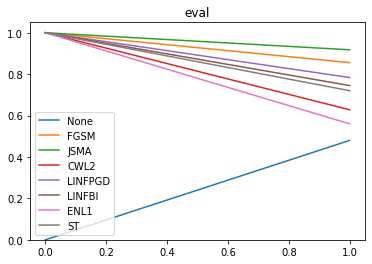

Mini-btach 102
Gen loss: 0.209 cor pen: 0.0 recon: 0.205 g_dis: 0.005
Dis loss: 1.225 Dis (DX) loss: 0.227 Dis (DGX) loss: 0.998
Mini-btach 103
Gen loss: 0.209 cor pen: 0.0 recon: 0.204 g_dis: 0.005
Dis loss: 1.204 Dis (DX) loss: 0.206 Dis (DGX) loss: 0.998
Mini-btach 104
Gen loss: 0.205 cor pen: 0.0 recon: 0.2 g_dis: 0.005
Dis loss: 1.252 Dis (DX) loss: 0.255 Dis (DGX) loss: 0.998
Mini-btach 105
Gen loss: 0.228 cor pen: 0.031 recon: 0.191 g_dis: 0.005
Dis loss: 1.189 Dis (DX) loss: 0.191 Dis (DGX) loss: 0.997
Mini-btach 106
Gen loss: 0.2 cor pen: 0.0 recon: 0.195 g_dis: 0.004
Dis loss: 1.219 Dis (DX) loss: 0.221 Dis (DGX) loss: 0.998
Mini-btach 107
Gen loss: 0.236 cor pen: 0.028 recon: 0.202 g_dis: 0.006
Dis loss: 1.196 Dis (DX) loss: 0.199 Dis (DGX) loss: 0.997
Mini-btach 108
Gen loss: 0.209 cor pen: 0.001 recon: 0.203 g_dis: 0.006
Dis loss: 1.234 Dis (DX) loss: 0.237 Dis (DGX) loss: 0.997
Mini-btach 109
Gen loss: 0.21 cor pen: 0.0 recon: 0.206 g_dis: 0.005
Dis loss: 1.244 Dis (DX) l

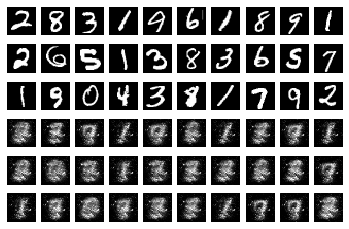

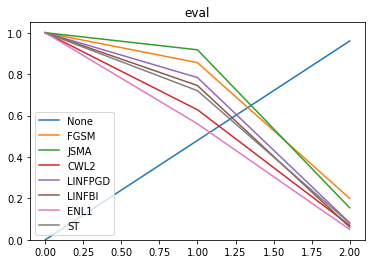

Mini-btach 202
Gen loss: 0.192 cor pen: 0.0 recon: 0.188 g_dis: 0.005
Dis loss: 1.084 Dis (DX) loss: 0.086 Dis (DGX) loss: 0.998
Mini-btach 203
Gen loss: 0.181 cor pen: 0.0 recon: 0.176 g_dis: 0.005
Dis loss: 1.08 Dis (DX) loss: 0.082 Dis (DGX) loss: 0.998
Mini-btach 204
Gen loss: 0.196 cor pen: 0.001 recon: 0.189 g_dis: 0.006
Dis loss: 1.077 Dis (DX) loss: 0.08 Dis (DGX) loss: 0.997
Mini-btach 205
Gen loss: 0.2 cor pen: 0.001 recon: 0.194 g_dis: 0.005
Dis loss: 1.075 Dis (DX) loss: 0.077 Dis (DGX) loss: 0.998
Mini-btach 206
Gen loss: 0.193 cor pen: 0.0 recon: 0.187 g_dis: 0.005
Dis loss: 1.077 Dis (DX) loss: 0.08 Dis (DGX) loss: 0.997
Mini-btach 207
Gen loss: 0.191 cor pen: 0.0 recon: 0.185 g_dis: 0.005
Dis loss: 1.079 Dis (DX) loss: 0.081 Dis (DGX) loss: 0.998
Mini-btach 208
Gen loss: 0.183 cor pen: 0.0 recon: 0.178 g_dis: 0.005
Dis loss: 1.077 Dis (DX) loss: 0.08 Dis (DGX) loss: 0.998
Mini-btach 209
Gen loss: 0.225 cor pen: 0.032 recon: 0.189 g_dis: 0.005
Dis loss: 1.075 Dis (DX) lo

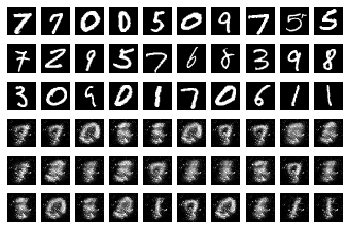

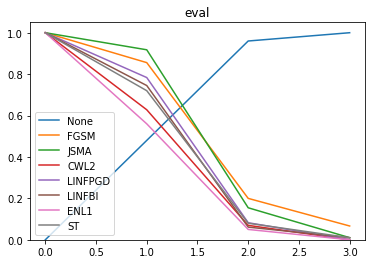

Mini-btach 302
Gen loss: 0.173 cor pen: 0.0 recon: 0.168 g_dis: 0.004
Dis loss: 1.044 Dis (DX) loss: 0.047 Dis (DGX) loss: 0.998
Mini-btach 303
Gen loss: 0.188 cor pen: 0.0 recon: 0.183 g_dis: 0.004
Dis loss: 1.039 Dis (DX) loss: 0.041 Dis (DGX) loss: 0.998
Mini-btach 304
Gen loss: 0.178 cor pen: 0.0 recon: 0.172 g_dis: 0.005
Dis loss: 1.04 Dis (DX) loss: 0.043 Dis (DGX) loss: 0.998
Mini-btach 305
Gen loss: 0.18 cor pen: 0.0 recon: 0.175 g_dis: 0.005
Dis loss: 1.04 Dis (DX) loss: 0.042 Dis (DGX) loss: 0.998
Mini-btach 306
Gen loss: 0.172 cor pen: 0.0 recon: 0.167 g_dis: 0.005
Dis loss: 1.037 Dis (DX) loss: 0.039 Dis (DGX) loss: 0.998
Mini-btach 307
Gen loss: 0.178 cor pen: 0.0 recon: 0.172 g_dis: 0.006
Dis loss: 1.03 Dis (DX) loss: 0.033 Dis (DGX) loss: 0.997
Mini-btach 308
Gen loss: 0.189 cor pen: 0.0 recon: 0.18 g_dis: 0.008
Dis loss: 1.034 Dis (DX) loss: 0.038 Dis (DGX) loss: 0.996
Mini-btach 309
Gen loss: 0.188 cor pen: 0.0 recon: 0.18 g_dis: 0.008
Dis loss: 1.028 Dis (DX) loss: 0.

In [ ]:
# 4. slightly bring Discriminator to game battle with Generator 
from OCCGAN import game 
G, D = game(G, G_optim, D, D_optim, model, loader, hyperparas)